In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np    
import matplotlib.pyplot as plt  
import math  
import time 

In [2]:
#  sample data for the AND logic gate

data = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]

# Create a DataFrame 
and_table = pd.DataFrame(data, columns=['A', 'B', 'result'])
and_table

,A,B,result
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [3]:
# a step function
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

In [4]:
# a bipolar step function
def bipolar_function(x):
  if x>0:
    return 1
  elif x == 0:
    return 0
  else:
    return -1

In [5]:
#  a sigmoid function.
def sigmoid_function(x):
  return (1/(1+(math.e**-x)))

In [6]:
# the Rectified Linear Unit (ReLU) activation function
def relu(x):
  if x>0:
    return x
  else:
    return 0

In [7]:
# Calculates the weighted sum of inputs with bias
def summation_unit(x1,x2,w0,w1,w2):
  return (w0)+(x1*w1)+(x2*w2)


# Calculates the weighted sum of input data points.
def summation_data(x0,x1,x2,w0,w1,w2):
  return (x0*w0)+(x1*w1)+(x2*w2)

Converged after epoch count: 18


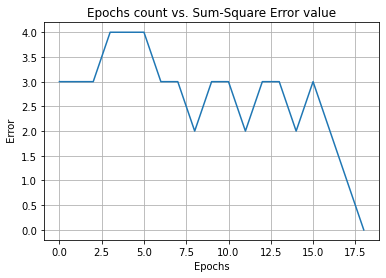

Final weights ==> w0: -1.5  w1: 1.2  w2: 0.75
Calculated Output: 0
Real Output: 0
Calculated Output: 0
Real Output: 0
Calculated Output: 0
Real Output: 0
Calculated Output: 1
Real Output: 1


In [8]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 100 epochs
while epoch_count < 100:
    error = 0

    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a step function (you can replace this with the desired activation function)
        def step_function(x):
            return 1 if x >= 0 else 0

        # Calculate the predicted output using the step function
        predicted_output = step_function(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)


    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel(' Error')
plt.title('Epochs count vs. Sum-Square Error value')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = step_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


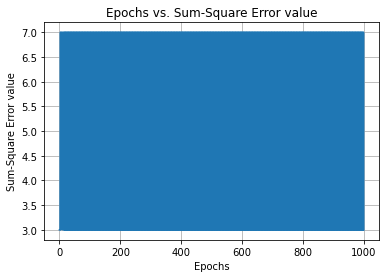

Final weights ==> w0: -1.0  w1: 1.2  w2: 1.25
1000
Calculated Output: -1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 1


In [9]:
# Question A2
# Bipolar Function
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

while epoch_count < 1000:
    error = 0

    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a bipolar step function (you can replace this with the desired activation function)
        def bipolar_function(x):
            return -1 if x < 0 else 1

        # Calculate the predicted output using the bipolar step function
        predicted_output = bipolar_function(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    
    epochs.append(epoch_count)
    sum_square_error.append(error)


    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error value')
plt.title('Epochs vs. Sum-Square Error value')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)
print(epoch_count)

for index, row in and_table.iterrows():
    calculated_output = bipolar_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])



Converged after epoch count: 451


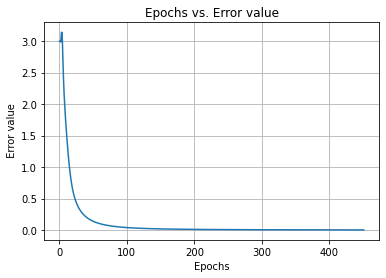

Final weights ==> w0: -11.01406446456043  w1: 7.251651917633865  w2: 7.237613596313013
Calculated Output: 1.646817326382425e-05
Real Output: 0
Calculated Output: 0.022390996364954657
Real Output: 0
Calculated Output: 0.022700359304807006
Real Output: 0
Calculated Output: 0.969973867639686
Real Output: 1


In [10]:
# Sigmoid Function
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0

    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a sigmoid function (you can replace this with the desired activation function)
        def sigmoid_function(x):
            return 1 / (1 + np.exp(-x))

        # Calculate the predicted output using the sigmoid function
        predicted_output = sigmoid_function(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel(' Error value')
plt.title('Epochs vs. Error value')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = sigmoid_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


Converged after epoch count: 20


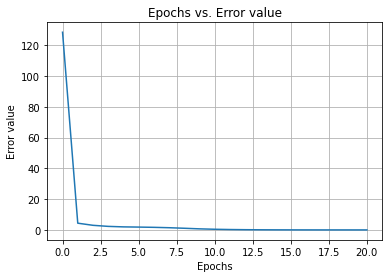

Final weights ==> w0: -0.9744791024733842  w1: 0.9999852734617888  w2: 0.9872469145057977
calculated output :  0
Real Output: 0
calculated output :  0.012767812032413506
Real Output: 0
calculated output :  0.025506170988404575
Real Output: 0
calculated output :  1.0127530854942024
Real Output: 1


In [11]:
# ReLu Function
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0

    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a ReLU function (you can replace this with the desired activation function)
        def relu(x):
            return max(0, x)

        # Calculate the predicted output using the ReLU function
        predicted_output = relu(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Error value')
plt.title('Epochs vs. Error value')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print real outputs
for index, row in and_table.iterrows():
    print("calculated output : ",relu(summation_unit(row['A'],row['B'],w0,w1,w2)))
    print("Real Output:", row['result'])


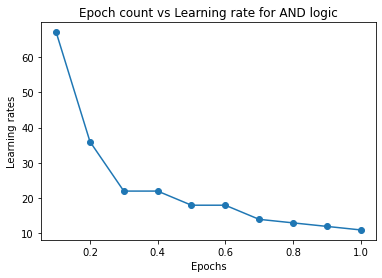

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# List of learning rates to experiment with
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize a list to store the number of epochs needed for convergence for each learning rate
number_of_epochs_needed = []

for learning_rate in learning_rates:
    # Initialize weights
    w0 = 10
    w1 = 0.2
    w2 = -0.75

    # Initialize epoch count and lists to track epoch and error values
    epoch_count = 0
    epochs = []
    sum_square_errors = []

    # Maximum number of epochs for training (in case it doesn't converge)
    max_epochs = 100

    while epoch_count < max_epochs:
        error = 0

        # Loop through the AND gate data
        for index, row in and_table.iterrows():
            # Calculate the weighted sum (summation unit)
            weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

            # Define a step function (you can replace this with the desired activation function)
            def step_function(x):
                return 1 if x >= 0 else 0

            # Calculate the predicted output using the step function
            predicted_output = step_function(weighted_sum)

            # Calculate the error
            e = row['result'] - predicted_output

            # Update weights
            w0 += learning_rate * e
            w1 += learning_rate * e * row['A']
            w2 += learning_rate * e * row['B']

            # Accumulate the error for this epoch
            error += e ** 2

        # Record epoch and error values
        epochs.append(epoch_count)
        sum_square_errors.append(error)

        # Check for convergence (error threshold of 0.002)
        if error < 0.002:
            number_of_epochs_needed.append(epoch_count)
            break

        # Increment the epoch count
        epoch_count += 1

# Plot learning rates vs. number of epochs needed for convergence
plt.plot(learning_rates, number_of_epochs_needed, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Learning rates')
plt.title('Epoch count vs Learning rate for AND logic')
plt.show()


In [13]:
# Question A4
# Repeat A1 TO A3 for XOR logic gate
Xor = [[0,0,0],[0,1,1],[1,0,1],[1,1,0]]
xor_table = pd.DataFrame(Xor,columns=['A','B','result'])


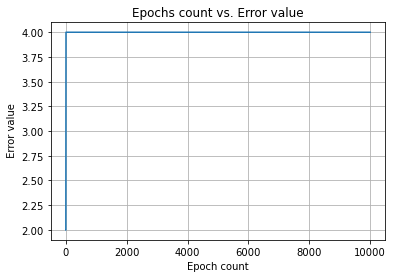

Final weights ==> w0: 0.0  w1: -0.5  w2: 0.0
10000
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 1
Calculated Output: 0
Real Output: 1
Calculated Output: 0
Real Output: 0


In [14]:
# Initial weights and learning rate
w0 = 1
w1 = 1
w2 = 1
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 10,000 epochs
while epoch_count < 10000:
    error = 0

    # Loop through the XOR gate data
    for index, row in xor_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a step function (you can replace this with the desired activation function)
        def step_function(x):
            return 1 if x >= 0 else 0

        # Calculate the predicted output using the step function
        predicted_output = step_function(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epoch count')
plt.ylabel(' Error value')
plt.title('Epochs count vs. Error value')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)
print(epoch_count)
# Test the perceptron with XOR gate inputs and print calculated and real outputs
for index, row in xor_table.iterrows():
    calculated_output = step_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


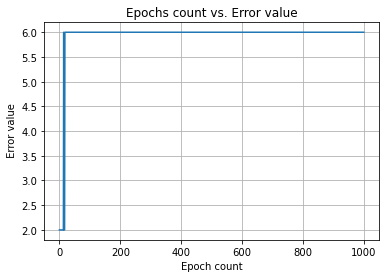

Final weights ==> w0: 1.0  w1: -0.7999999999999998  w2: -0.75
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: -1
Real Output: 1


In [15]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0

    # Loop through the AND gate data
    for index, row in xor_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a bipolar step function 
        def bipolar_function(x):
            return -1 if x < 0 else 1

        # Calculate the predicted output using the bipolar step function
        predicted_output = bipolar_function(weighted_sum)
        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epoch count')
plt.ylabel(' Error value')
plt.title('Epochs count vs. Error value')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = bipolar_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


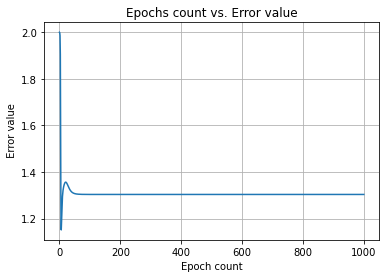

Final weights ==> w0: 0.2854396608267673  w1: -0.5708793216535337  w2: -0.28543966082676675
Calculated Output: 0.5708793216535331
Real Output: 0
Calculated Output: 0.5000000000000001
Real Output: 0
Calculated Output: 0.42912067834646717
Real Output: 0
Calculated Output: 0.3610339507358464
Real Output: 1


In [16]:
#Sigmoid Function
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0

    # Loop through the Xor gate data
    for index, row in xor_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a sigmoid function 
        def sigmoid_function(x):
            return 1 / (1 + np.exp(-x))

        # Calculate the predicted output using the sigmoid function
        predicted_output = sigmoid_function(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epoch count')
plt.ylabel(' Error value')
plt.title('Epochs count vs. Error value')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

for index, row in and_table.iterrows():
    calculated_output = sigmoid_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])

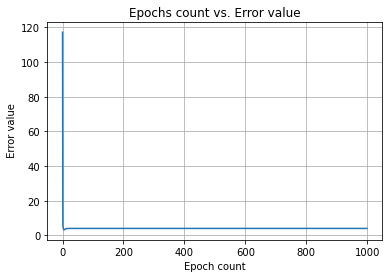

Final weights ==> w0: 0.9999999999999998  w1: -0.9999999999999998  w2: -0.49999999999999994
calculated output :  0.9999999999999998
Real Output: 0
calculated output :  0.49999999999999983
Real Output: 0
calculated output :  0
Real Output: 0
calculated output :  0
Real Output: 1


In [17]:
# ReLu Function 
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0

    # Loop through the xor gate data
    for index, row in xor_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a ReLU function (you can replace this with the desired activation function)
        def relu(x):
            return max(0, x)

        # Calculate the predicted output using the ReLU function
        predicted_output = relu(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epoch count')
plt.ylabel(' Error value')
plt.title('Epochs count vs. Error value')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print real outputs
for index, row in and_table.iterrows():
    print("calculated output : ",relu(summation_unit(row['A'],row['B'],w0,w1,w2)))
    print("Real Output:", row['result'])

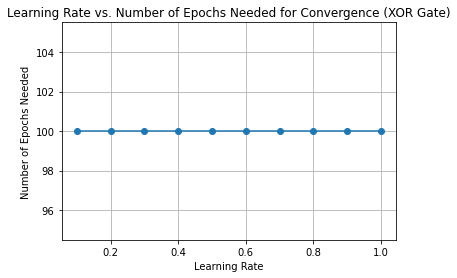

100


In [18]:
# Question A3 using XOR gate
# List of learning rates to experiment with
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize a list to store the number of epochs needed for convergence for each learning rate
number_of_epochs_needed = []

for learning_rate in learning_rates:
    # Initialize weights
    w0 = 10
    w1 = 0.2
    w2 = -0.75

    # Initialize epoch count and lists to track epoch and error values
    epoch_count = 0
    epochs = []
    sum_square_errors = []

    # XOR gate data
    xortable = [
        {'A': 0, 'B': 0, 'result': 0},
        {'A': 0, 'B': 1, 'result': 1},
        {'A': 1, 'B': 0, 'result': 1},
        {'A': 1, 'B': 1, 'result': 0}
    ]

    # Maximum number of epochs for training (in case it doesn't converge)
    max_epochs = 100

    while epoch_count < max_epochs:
        error = 0

        # Loop through the XOR gate data
        for row in xortable:
            # Calculate the weighted sum (summation unit)
            weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

            # Define a step function (you can replace this with the desired activation function)
            def step_function(x):
                return 1 if x >= 0 else 0

            # Calculate the predicted output using the step function
            predicted_output = step_function(weighted_sum)

            # Calculate the error
            e = row['result'] - predicted_output

            # Update weights
            w0 += learning_rate * e
            w1 += learning_rate * e * row['A']
            w2 += learning_rate * e * row['B']

            # Accumulate the error for this epoch
            error += e ** 2

        # Record epoch and error values
        epochs.append(epoch_count)
        sum_square_errors.append(error)

        # Check for convergence (error threshold of 0.002)
        if error < 0.002:
            break

        # Increment the epoch count
        epoch_count += 1

    # Append the number of epochs needed to converge for this learning rate
    number_of_epochs_needed.append(epoch_count)

# Plot learning rates vs. number of epochs needed for convergence
plt.plot(learning_rates, number_of_epochs_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs Needed')
plt.title('Learning Rate vs. Number of Epochs Needed for Convergence (XOR Gate)')
plt.grid()
plt.show()
print(epoch_count)


C:\Users\pavan\AppData\Local\Temp/ipykernel_8532/2162590571.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


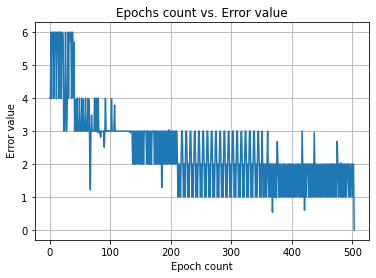

Final weights ==> w0: -3.621316356315513  w1: -53.48035135810678  w2: 8.403547545518459  w3: -21.15004489917351  w4: 4.613955460272609
   Candies  Mangoes  MilkPackets  Payment  PredictedOutput
0       17        5            3      320     1.000000e+00
1       23        2            4      150    2.261180e-265


In [19]:
# Question A5
# Define customer data with features
data = pd.DataFrame({
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'MilkPackets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'HighValueTx': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
})


data['HighValueTx'] = data['HighValueTx'].map({'Yes': 1, 'No': 0})

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights and learning rate
w0 = 0.1
w1 = 0.2
w2 = 0.3
w3 = 0.4
w4 = 0.5
learning_rate = 0.01

# Initialize epoch count and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_errors = []

# Maximum number of epochs for training (in case it doesn't converge)
max_epochs = 1000

while epoch_count < max_epochs:
    error = 0

    for index, row in data.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = w0 + w1 * row['Candies'] + w2 * row['Mangoes'] + w3 * row['MilkPackets'] + w4 * row['Payment']

        # Calculate the predicted output using the sigmoid function
        predicted_output = sigmoid(weighted_sum)

        # Calculate the error
        e = row['HighValueTx'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['Candies']
        w2 += learning_rate * e * row['Mangoes']
        w3 += learning_rate * e * row['MilkPackets']
        w4 += learning_rate * e * row['Payment']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_errors.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
       
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_errors)
plt.xlabel('Epoch count')
plt.ylabel(' Error value')
plt.title('Epochs count vs. Error value')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2, " w3:", w3, " w4:", w4)

# Test the perceptron with sample data and print predicted outputs
sample_data = pd.DataFrame({
    'Candies': [17, 23],
    'Mangoes': [5, 2],
    'MilkPackets': [3, 4],
    'Payment': [320, 150]
})

predicted_outputs = []
for index, row in sample_data.iterrows():
    weighted_sum = w0 + w1 * row['Candies'] + w2 * row['Mangoes'] + w3 * row['MilkPackets'] + w4 * row['Payment']
    predicted_output = sigmoid(weighted_sum)
    predicted_outputs.append(predicted_output)

sample_data['PredictedOutput'] = predicted_outputs
print(sample_data)



In [20]:
# Question A6:
# Comparing the pseudo-inverse matrix application on the dataframe of customer data

def pseudo_inverse_method(dataframe_input, dataframe_output):
    matrix_input = np.matrix(dataframe_input)
    matrix_output = np.matrix(dataframe_output).reshape(10, 1)
    pseudo_inverse_matrix_input = np.matrix(np.linalg.pinv(matrix_input))
    matrix_solution = np.matmul(pseudo_inverse_matrix_input, matrix_output)
    return matrix_solution

In [21]:
# using matrix inversion:

# Select columns from the DataFrame
A = data[['Candies', 'Mangoes', 'MilkPackets']]
B = data[['Payment']]

# Calculate the pseudo-inverse of matrix A and solve for X using matrix multiplication
start = time.time()
Ain = np.linalg.pinv(A)
X = np.dot(Ain, B)
end = time.time()

# Calculate and print the time taken for the matrix operations
print("Time taken using matrix inversion:", end - start)


Time taken using matrix inversion: 0.014573812484741211


In [22]:
print("The matrix is \n",X)

The matrix is 
 [[ 1.]
 [55.]
 [18.]]


In [23]:
w0 = 1
w1 = 54
w2 = 18
learning_rate = 0.01

# Initialize variables to track epochs and errors
epoch_count = 0
epoches = []
sum_square_error = []

start = time.time()

# Perform training for a maximum of 10 epochs
while epoch_count < 10:
    error = 0

    # Iterate through the dataset
    for index, row in data.iterrows():
        predicted_value = summation_data(row['Candies'], row['Mangoes'], row['MilkPackets'], w0, w1, w2)
        actual_value = row['Payment']

        if predicted_value != actual_value:
            e = actual_value - predicted_value

            # Update weights using the perceptron learning rule
            w0 += learning_rate * e * row['Candies']
            w1 += learning_rate * e * row['Mangoes']
            w2 += learning_rate * e * row['MilkPackets']

            error += e ** 2

    # Track the current epoch and error
    epoches.append(epoch_count)
    epoch_count += 1
    sum_square_error.append(error)

    # Check for convergence (error threshold)
    if error < 0.002:
        print("Converged at epoch count:", epoch_count)
        break

end = time.time()
print("Time taken by perceptron:", end - start)
print("Weights ==> w0:", w0, " w1:", w1, " w2:", w2)

Time taken by perceptron: 0.0
Weights ==> w0: -5.512515357708273e+45  w1: -1.0146028551405357e+45  w2: -1.5263557771905693e+45


In [24]:
# Question A7
# Initialize weights and learning rate
V = [[1, -1], [1, 1]]
W = [1, 1]
learning_rate = 0.05

# Initialize variables for iterations and errors
iter = 0
error = 0
errors = []

# Training loop
while iter < 1000 and (error > 0.02 or error == 0):
    error = 0

    # Iterate through the AND logic table
    for index, row in and_table.iterrows():
        input_hidden = []
        out_hidden = []

        # Calculate input to hidden layer
        input_hidden.append(row['A'] * V[0][0] + row['B'] * V[1][0])
        input_hidden.append(row['A'] * V[0][1] + row['B'] * V[1][1])

        # Apply sigmoid activation function to hidden layer
        out_hidden.append(sigmoid_function(input_hidden[0]))
        out_hidden.append(sigmoid_function(input_hidden[1]))

        # Calculate output using the hidden layer
        output = sigmoid_function(out_hidden[0] * W[0] + (out_hidden[1] * W[1]))

        # Calculate error and deltas
        ERROR = row['result'] - output
        delta1 = ((ERROR) * output * (1 - output))
        delta2 = [
            delta1 * W[0] * out_hidden[0] * (1 - out_hidden[0]),
            delta1 * W[1] * out_hidden[1] * (1 - out_hidden[1])
        ]

        # Update weights for the output layer
        for i in range(len(W)):
            W[i] += learning_rate * delta1 * out_hidden[i]

        # Update weights for the hidden layer
        V[0][0] += learning_rate * delta2[0] * row['A']
        V[0][1] += learning_rate * delta2[1] * row['A']
        V[1][0] += learning_rate * delta2[0] * row['B']
        V[1][1] += learning_rate * delta2[1] * row['B']

        # Calculate the cumulative error for this iteration
        error += ERROR ** 2

    # Track errors and iterations
    errors.append(error)
    iter += 1

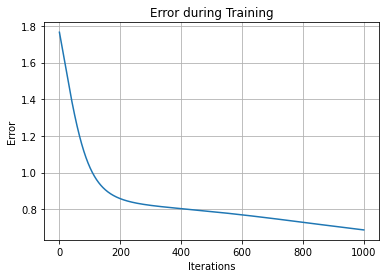

In [25]:
# Plot the errors during the training
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error during Training')
plt.grid()
plt.show()


In [26]:
# Question A8
# Initialize weights and learning rate
V = [[1, 1], [1, 1]]
W = [1, 1]
learning_rate = 0.05

# Initialize variables for iterations and errors
iter = 0
error = 0
errors = []

# Training loop
while iter < 1000 and (error > 0.02 or error == 0):
    error = 0

    # Iterate through the XOR logic table
    for index, row in xor_table.iterrows():
        input_hidden = []
        out_hidden = []

        # Calculate input to hidden layer
        input_hidden.append(row['A'] * V[0][0] + row['B'] * V[1][0])
        input_hidden.append(row['A'] * V[0][1] + row['B'] * V[1][1])

        # Apply sigmoid activation function to hidden layer
        out_hidden.append(sigmoid_function(input_hidden[0]))
        out_hidden.append(sigmoid_function(input_hidden[1]))

        # Calculate output using the hidden layer
        output = sigmoid_function(out_hidden[0] * W[0] + (out_hidden[1] * W[1]))

        # Calculate error and deltas
        ERROR = row['result'] - output
        delta1 = ((ERROR) * output * (1 - output))
        delta2 = [
            delta1 * W[0] * out_hidden[0] * (1 - out_hidden[0]),
            delta1 * W[1] * out_hidden[1] * (1 - out_hidden[1])
        ]

        # Update weights for the output layer
        for i in range(len(W)):
            W[i] += learning_rate * delta1 * out_hidden[i]

        # Update weights for the hidden layer
        V[0][0] += learning_rate * delta2[0] * row['A']
        V[0][1] += learning_rate * delta2[1] * row['A']
        V[1][0] += learning_rate * delta2[0] * row['B']
        V[1][1] += learning_rate * delta2[1] * row['B']

        # Calculate the cumulative error for this iteration
        error += ERROR ** 2

    # Track errors and iterations
    errors.append(error)
    iter += 1


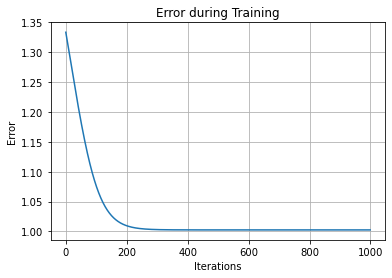

In [27]:
# Plot the errors during the training
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error during Training')
plt.grid()
plt.show()

In [28]:
# Question A9 for A1
# Initialize weights and learning rate
V = [[1, 1], [1, 1]]
W = [[1, 1], [1, 1]]
learning_rate = 0.05

# Initialize variables for iterations and errors
iter = 0
error = 0
errors = []
input_hidden = []
out_hidden = []

# Training loop
while iter < 1000 and (error > 0.02 or error == 0):
    error = 0

    # Iterate through the AND logic table
    for index, row in and_table.iterrows():
        O_array = [not (row['result']), row['result']]
        input_hidden = []
        out_hidden = []
        output = []
        ERROR = []

        # Calculate input to hidden layer
        input_hidden.append(row['A'] * V[0][0] + row['B'] * V[1][0])
        input_hidden.append(row['A'] * V[0][1] + row['B'] * V[1][1])

        # Apply sigmoid activation function to hidden layer
        out_hidden.append(sigmoid_function(input_hidden[0]))
        out_hidden.append(sigmoid_function(input_hidden[1]))

        # Calculate output using the hidden layer
        output.append(sigmoid_function(out_hidden[0] * W[0][0] + out_hidden[1] * W[1][0]))
        output.append(sigmoid_function(out_hidden[1] * W[1][1] + out_hidden[0] * W[0][1]))

        # Calculate error and deltas
        ERROR.append(O_array[0] - output[0])
        ERROR.append(O_array[1] - output[1])

        delta1 = [(ERROR[0]) * output[0] * (1 - output[0]), (ERROR[1]) * output[1] * (1 - output[1])]
        delta2 = [
            (delta1[0] * W[0][0] + delta1[1] * W[0][1]) * out_hidden[0] * (1 - out_hidden[0]),
            (delta1[0] * W[1][0] + delta1[1] * W[1][1]) * out_hidden[1] * (1 - out_hidden[1])
        ]

        # Update weights for the output layer
        W[0][0] += learning_rate * delta1[0] * out_hidden[0]
        W[0][1] += learning_rate * delta1[1] * out_hidden[0]
        W[1][0] += learning_rate * delta1[0] * out_hidden[1]
        W[1][1] += learning_rate * delta1[1] * out_hidden[1]

        # Update weights for the hidden layer
        V[0][0] += learning_rate * delta2[0] * row['A']
        V[0][1] += learning_rate * delta2[1] * row['A']
        V[1][0] += learning_rate * delta2[0] * row['B']
        V[1][1] += learning_rate * delta2[1] * row['B']

        # Calculate the cumulative error for this iteration
        error += (ERROR[0] ** 2 + ERROR[1] ** 2)

    # Track errors and iterations
    errors.append(error)
    iter += 1


In [29]:
# Question A9 for A2
# Define the activation function (Step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Define the sigmoid function for Experiment A2
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights and learning rate
w0 = -1.5
w1 = 1.2
w2 = 0.75
learning_rate = 0.05

# Define the AND gate truth table
and_table = [
    {'A': 0, 'B': 0, 'result': [1, 0]},  # Output: [1 0] for logic 0
    {'A': 0, 'B': 1, 'result': [1, 0]},  # Output: [1 0] for logic 0
    {'A': 1, 'B': 0, 'result': [1, 0]},  # Output: [1 0] for logic 0
    {'A': 1, 'B': 1, 'result': [0, 1]}   # Output: [0 1] for logic 1
]

# Training loop
epochs = 0
converged = False

while not converged and epochs < 1000:
    converged = True
    for row in and_table:
        inputs = [row['A'], row['B']]
        target_output = row['result']

        # Calculate perceptron output
        perceptron_output = [step_function(w0 + w1 * inputs[0] + w2 * inputs[1])]

        # Check for convergence
        if perceptron_output != target_output:
            converged = False

        # Update weights
        w0 += learning_rate * (target_output[0] - perceptron_output[0])
        w1 += learning_rate * (target_output[0] - perceptron_output[0]) * inputs[0]
        w2 += learning_rate * (target_output[0] - perceptron_output[0]) * inputs[1]

    epochs += 1

# Print final weights and epochs needed for convergence
print("Final Weights (w0, w1, w2):", w0, w1, w2)
print("Epochs needed for convergence:", epochs)


Final Weights (w0, w1, w2): 0.10000000000000077 -0.10000000000000055 -0.0500000000000001
Epochs needed for convergence: 1000


In [30]:
# Question A10
from sklearn.neural_network import MLPClassifier
# Create an MLPClassifier with specified parameters
MLP = MLPClassifier(
    hidden_layer_sizes=2,        
    activation='logistic',       # Activation function for hidden layers ('logistic' for sigmoid)
    solver='sgd',                # Solver for weight optimization (Stochastic Gradient Descent)
    learning_rate_init=0.02,   
    max_iter=1000                
)


In [31]:
X_xorTable = xor_table[['A', 'B']]
Y_xorTable = xor_table['result']

# Fit the MLPClassifier model on the input features and target labels
MLP.fit(X_xorTable, Y_xorTable)

# Calculate and print the accuracy score of the model on the same data
accuracy_score = MLP.score(X_xorTable, Y_xorTable)
print("Accuracy Score:", accuracy_score)
print(X_xorTable)

Accuracy Score: 0.5
   A  B
0  0  0
1  0  1
2  1  0
3  1  1


In [34]:
# Question A11
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing as prepro 

#Insert your features and labels
samples = np.load(r'activation_maps_lines_image52_pixel.npy')
features = np.load(r'activation_maps_lines_image52_labelpixel.npy')

print("The shape of samples and featuresis:\n ",samples.shape,features.shape)
# Reshape your data  (pixels x features)
samples_num = samples.shape[0]   # Total number of pixels
features_num = samples.shape[1]  # Number of features for each pixel
X_reshaped = samples.reshape(samples_num,features_num)
y_reshaped = features.reshape(samples_num)  # Assuming y is your pixel-wise label mask
print(X_reshaped.shape,y_reshaped.shape)
samples = pd.DataFrame(samples,columns=np.arange(0,13))
samples['13']=features # Adding features coulmn into the samples dataset 
samples.info()

The shape of samples and featuresis:
  (16384, 13) (16384, 1)
(16384, 13) (16384,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16384 entries, 0 to 16383
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16384 non-null  float64
 1   1       16384 non-null  float64
 2   2       16384 non-null  float64
 3   3       16384 non-null  float64
 4   4       16384 non-null  float64
 5   5       16384 non-null  float64
 6   6       16384 non-null  float64
 7   7       16384 non-null  float64
 8   8       16384 non-null  float64
 9   9       16384 non-null  float64
 10  10      16384 non-null  float64
 11  11      16384 non-null  float64
 12  12      16384 non-null  float64
 13  13      16384 non-null  uint8  
dtypes: float64(13), uint8(1)
memory usage: 1.6 MB


In [35]:
#Breaking the data set into training set and testing set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the reshaped data into training and testing sets
data_train, data_test, output_train, output_test = train_test_split(X_reshaped, y_reshaped, test_size=0.3, random_state=42)

In [36]:
# Create an MLPClassifier with specified parameters
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  
    activation='relu',             # Activation function for hidden layers ('relu' for rectified linear unit)
    solver='adam',                
    max_iter=1000,                
    random_state=42                
)

# Fit the MLPClassifier model on the training data
mlp.fit(data_train, output_train)

# Calculate and print the accuracy score of the model on the training data
training_accuracy = mlp.score(data_train, output_train)
print("Training Accuracy Score:", training_accuracy)

Training Accuracy Score: 0.5526682943843739


In [41]:
from sklearn.metrics import classification_report
mlp.fit(data_train, output_train)
predicted_output = mlp.predict(data_test)
print(classification_report(output_test, predicted_output))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1392
           1       0.00      0.00      0.00       180
         128       0.00      0.00      0.00       594
         255       0.56      1.00      0.72      2750

    accuracy                           0.56      4916
   macro avg       0.14      0.25      0.18      4916
weighted avg       0.31      0.56      0.40      4916



C:\Users\pavan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
